A linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, This model will determine what it takes to be one of the best tennis players in the world. by training simple and Multiple linear regression model. 

The ATP, or [Association of Tennis Professionals](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals "please click for more understanding about ATP"), is responsible for overseeing men's professional tennis. Founded in 1972 by Donald Dell, Jack Kramer, and Cliff Drysdale with the intention of protecting the interests of professional players, with Drysdale serving as the first president. The organization manages the ATP Tour, ATP Challenger Tour, and ATP Champions Tour. From 1990, it was known as the ATP Tour, with the name being changed to ATP in 2001, then to ATP World Tour in 2009, and back to ATP Tour in 2019. It has evolved from previous tour competitions such as the Grand Prix and World Championship Tennis (WCT). The ATP has its global headquarters in London, with regional offices located in Ponte Vedra Beach, Florida, Monaco, and Sydney, Australia.

data sources: [Association of Tennis Professionals](https://www.atptour.com/en/ "please click for more information aboout the data source")

In [41]:
#import library

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
# load and Investigate data

ts = pd.read_csv("tennis_stats.csv")

In [30]:
ts.head()

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

In [43]:
ts.shape

(1721, 24)

In [45]:
#covert every variables to lower case
ts.columns = ts.columns.str.lower()
ts.columns

Index(['player', 'year', 'firstserve', 'firstservepointswon',
       'firstservereturnpointswon', 'secondservepointswon',
       'secondservereturnpointswon', 'aces', 'breakpointsconverted',
       'breakpointsfaced', 'breakpointsopportunities', 'breakpointssaved',
       'doublefaults', 'returngamesplayed', 'returngameswon',
       'returnpointswon', 'servicegamesplayed', 'servicegameswon',
       'totalpointswon', 'totalservicepointswon', 'wins', 'losses', 'winnings',
       'ranking'],
      dtype='object')

 The data from the ATP [Association of Tennis Professionals](https://www.atptour.com/en/ "please click for more information aboout the data source") contains statistics for the top 1500 ranked players in the ATP between 2009 and 2017 is loaded into the pandas DataFrame. The data includes statistics for each player's service and return games, as well as outcomes. 


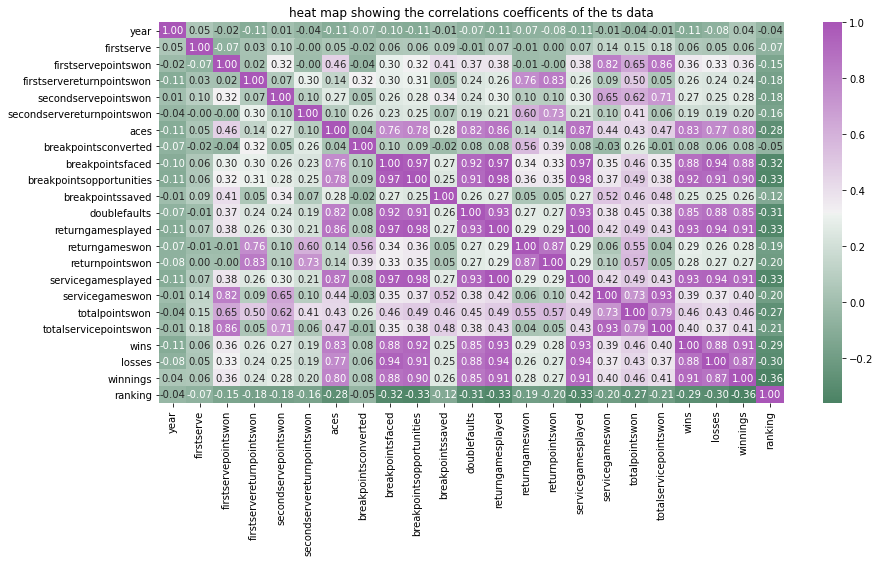

<Figure size 432x288 with 0 Axes>

In [82]:
#use heat map to create a 2D graphically represent the data.

plt.figure(figsize = (14, 7))
sns.heatmap(ts.corr(), annot = True, cbar=True, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True),fmt = ".2f")
plt.title("heat map showing the correlations coefficents of the ts data points")
plt.show()
plt.clf()

The heat maps shows the feature that has a strong linear relationship with the outcome. the correlation btw between break points opportunities and wins is 0.92. from the heat map we could tell the level of the linear relationship between the features and the outcomes.

### _*single feature linear regressions model*_

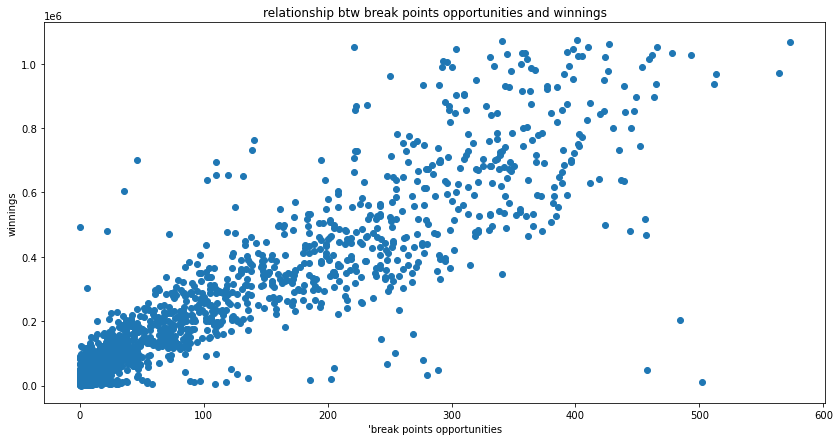

<Figure size 432x288 with 0 Axes>

In [127]:
#select features and outcome to checks
#checking for linear relation btw variables, scatter plot is applied
feature = ts[["breakpointsopportunities"]]
outcome = ts[["winnings"]]

plt.figure(figsize = (14, 7))
plt.scatter(bpo, outcome)
plt.title("relationship btw break points opportunities and winnings")
plt.xlabel("'break points opportunities")
plt.ylabel("winnings")
plt.show()
plt.clf()

In [128]:
#spliting data into train set and test set
feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size = 0.80, test_size = 0.20)

In [129]:
#create a simple linear regression model with a single feature
#train the model by fitting the trained data 

model = LinearRegression() #instantiate the model
model = model.fit(feature_train, outcome_train)

In [130]:
#score the model base on the test set
score_results = model.score(feature_test, outcome_test)
print("Checking prediction accuracy of winning of the single feature model trained based on break points opportunities: %.5f" % score_results)

Checking prediction accuracy of winning of the single feature model trained based on break points opportunities: 0.80322


In [131]:
#review coefficient and intercept point of the in the trained model
print("Coefficient: %.5f" % model.coef_)
print("Point of intercept: %.5f" % model.intercept_)

Coefficient: 1827.74775
Point of intercept: 44956.74178


In [125]:
#predict winning based on the trained model
winning_prediction = model.predict(feature_test)

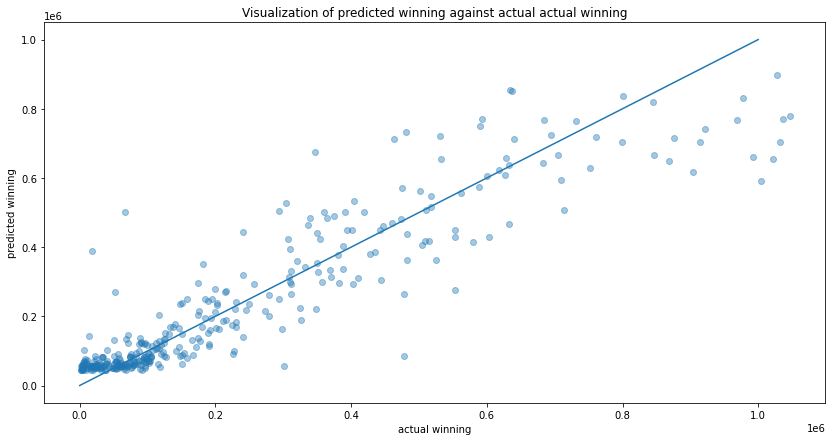

In [126]:
#visualization of winning prediction against actual winning
plt.figure(figsize = (14,7))
plt.scatter(outcome_test, winning_prediction, alpha = 0.4)
plt.plot(range(1000000), range(1000000))
plt.title("Visualization of predicted winning against actual actual winning")
plt.xlabel("actual winning")
plt.ylabel("predicted winning")
plt.show()

### _*Training a multiple feature Regression Model*_

In [95]:
#multiple features selection 
features = ts[['firstserve', 'firstservepointswon',
       'firstservereturnpointswon', 'secondservepointswon',
       'secondservereturnpointswon', 'aces', 'breakpointsconverted',
       'breakpointsfaced', 'breakpointsopportunities', 'breakpointssaved',
       'doublefaults', 'returngamesplayed', 'returngameswon',
       'returnpointswon', 'servicegamesplayed', 'servicegameswon',
       'totalpointswon', 'totalservicepointswon']]

#review the selected features
features.head(3)

firstserve  firstservepointswon  firstservereturnpointswon  \
0        0.88                 0.50                       0.38   
1        0.84                 0.62                       0.26   
2        0.83                 0.60                       0.28   

   secondservepointswon  secondservereturnpointswon  aces  \
0                  0.50                        0.39     0   
1                  0.33                        0.07     7   
2                  0.53                        0.44     2   

   breakpointsconverted  breakpointsfaced  breakpointsopportunities  \
0                  0.14                 7                         7   
1                  0.00                 7                         0   
2                  0.38                10                         8   

   breakpointssaved  doublefaults  returngamesplayed  returngameswon  \
0              0.43             2                  9            0.11   
1              0.57             1                  9            0.00   
2              0.40             1                 19            0.16   

   returnpointswon  servicegamesplayed  servicegameswon  totalpointswon  \
0             0.38                   8             0.50            0.43   
1             0.20                   9             0.67            0.41   
2             0.34                  17             0.65            0.45   

   totalservicepointswon  
0                   0.50  
1                   0.57  
2                   0.59

In [133]:
#dependent variable selection
outcome_w = ts[["winnings"]]
outcome_w[:2] #review 

winnings
0     39820
1     17334

In [97]:
#split dataset to train 80% and test 20%
# use train_test_split from model_selection 
features_train, features_test, outcome_w_train, outcome_w_test = train_test_split(features, outcome_w, train_size = 0.80, test_size = 0.20)

In [98]:
#create a model and train the model with the multiple features split 
mlr = LinearRegression()
mlr = mlr.fit(features_train, outcome_w_train) #fitting the data into the model, after it has be instantiated

#checking accuracy of winning prediction with the trained model based on multiple features
print("Score trained model accuracy: %.5f" % mlr.score(features_train, outcome_w_train))
print("Score tested model accuracy: %.5f" % mlr.score(features_test, outcome_w_test))

Score for trained model: 0.85599
Score for tested model: 0.78771


In [106]:
#check for slope and intercept
print("The coefficient:")
print(mlr.coef_)
print("\n")
print("The point of intercept:")
print(mlr.intercept_)

The coefficient:
[[ 2.24281846e+04  1.96140806e+05 -9.08042261e+03  1.32936069e+05
   2.38923987e+04 -8.30701703e+01  2.43754447e+03 -1.06046227e+03
   7.91538104e+02  6.42862813e+04  5.26390083e+02 -4.38835655e+01
   6.30807414e+04 -2.98512415e+04  1.13538869e+03 -2.88077157e+04
  -2.84806889e+05 -1.54665805e+05]]


The point of intercept:
[28118.64603647]


In [107]:
#predict winnings with the multiple feature trained model
winning_prediction = mlr.predict(features_test)

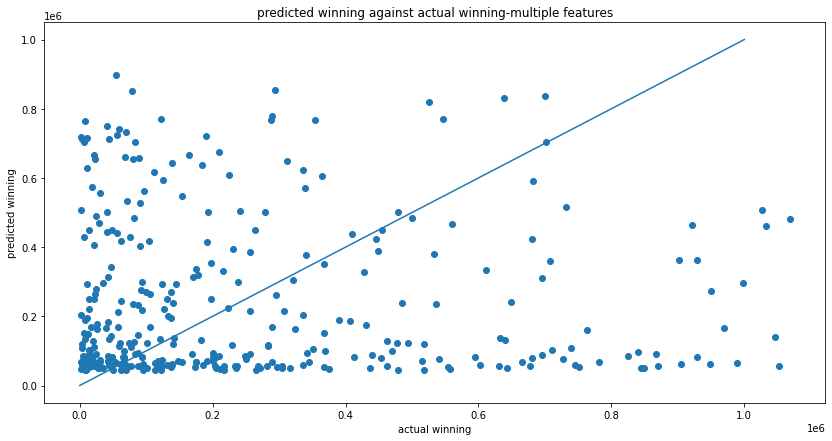

In [135]:
#plot predicted winning against actual winning

plt.figure(figsize = (14, 7))
plt.scatter(outcome_test, winning_prediction)
plt.plot(range(1000000), range(1000000))
plt.title("predicted winning against actual winning-multiple features")
plt.xlabel("actual winning")
plt.ylabel("predicted winning")
plt.show()